random height

In [ ]:
import random

# Constants
Hmin = 2.5
Hmax = 20
Lx = 195
Ly = 195
Lz = 25
blocksize = 5
gap = 12.5
offset = (Lx - ((4 * gap) + (5 * blocksize))) / 2  # margin

geo = []
geo.append('SetFactory("OpenCASCADE");\n')
geo.append(f'Box(1) = {{0, 0, 0, {Lx}, {Ly}, {Lz}}};\n')

block_ids = []

# Generate 25 boxes with random heights
id_counter = 2
for j in range(5):
    for i in range(5):
        x = offset + i * (blocksize + gap)
        y = offset + j * (blocksize + gap)
        H = round(random.uniform(Hmin, Hmax), 3)  # Rounded to 3 decimal places
        geo.append(f'Box({id_counter}) = {{{x}, {y}, 0, {blocksize}, {blocksize}, {H}}};\n')
        block_ids.append(id_counter)
        id_counter += 1

# Boolean difference
block_range = f'{block_ids[0]}:{block_ids[-1]}'
geo.append(f'\nBooleanDifference{{ Volume{{1}}; Delete; }}{{ Volume{{{block_range}}}; Delete; }}\n')

# Physical groups
geo.append(f'\nPhysical Volume("Domain") = {{1}};\n')
geo.append(f'Physical Volume("Blocks") = {{{", ".join(map(str, block_ids))}}};\n')

# Write to file
with open("random_blocks.geo", "w") as f:
    f.writelines(geo)

print("random_blocks.geo file generated successfully.")


random_blocks.geo file generated successfully.


random gap

In [ ]:

import random

# Constants
H = 12.5
Lx = 195
Ly = 195
Lz = 6*H
blocksize = 5

geo = []
geo.append('SetFactory("OpenCASCADE");\n')
geo.append(f'Box(1) = {{0, 0, 0, {Lx}, {Ly}, {Lz}}};\n')

block_ids = []
id_counter = 2

# Generate 5 random horizontal (x-axis) and vertical (y-axis) gaps
x_gaps = [round(random.uniform(1, 12.5), 2) for _ in range(4)]
y_gaps = [round(random.uniform(1, 12.5), 2) for _ in range(4)]

# Compute cumulative positions based on random gaps
x_positions = [0]
for g in x_gaps:
    x_positions.append(x_positions[-1] + blocksize + g)

y_positions = [0]
for g in y_gaps:
    y_positions.append(y_positions[-1] + blocksize + g)

# Center the grid in the Lx x Ly domain
total_width = x_positions[-1] + blocksize
total_height = y_positions[-1] + blocksize
x_offset = (Lx - total_width) / 2
y_offset = (Ly - total_height) / 2

# Create 5x5 blocks
for j in range(5):
    for i in range(5):
        x = x_offset + x_positions[i]
        y = y_offset + y_positions[j]
        geo.append(f'Box({id_counter}) = {{{x}, {y}, 0, {blocksize}, {blocksize}, {H}}};\n')
        block_ids.append(id_counter)
        id_counter += 1

# Boolean Difference
block_range = f'{block_ids[0]}:{block_ids[-1]}'
geo.append(f'\nBooleanDifference{{ Volume{{1}}; Delete; }}{{ Volume{{{block_range}}}; Delete; }}\n')

# Physical Groups
geo.append(f'\nPhysical Volume("Domain") = {{1}};\n')
geo.append(f'Physical Volume("Blocks") = {{{", ".join(map(str, block_ids))}}};\n')

# Output to file
with open(f"constant_height_{H}random_gap.geo", "w") as f:
    f.writelines(geo)

print("random_gap_blocks.geo file generated successfully.")


random_gap_blocks.geo file generated successfully.


In [ ]:
import random

# Constants
H = 5
Lx = 195
Ly = 195
Lz = 25
blocksize = 5

# Random gap (same for both x and y directions)
gap = round(random.uniform(2.5, 12.5), 2)

geo = []
geo.append('SetFactory("OpenCASCADE");\n')
geo.append(f'Box(1) = {{0, 0, 0, {Lx}, {Ly}, {Lz}}};\n')

block_ids = []
id_counter = 2

# Compute cumulative positions based on single gap
positions = [i * (blocksize + gap) for i in range(5)]

# Center the grid
grid_width = positions[-1] + blocksize
offset = (Lx - grid_width) / 2  # same offset for x and y

# Create 5x5 blocks
for j in range(5):
    for i in range(5):
        x = offset + positions[i]
        y = offset + positions[j]
        geo.append(f'Box({id_counter}) = {{{x}, {y}, 0, {blocksize}, {blocksize}, {H}}};\n')
        block_ids.append(id_counter)
        id_counter += 1

# Boolean Difference
block_range = f'{block_ids[0]}:{block_ids[-1]}'
geo.append(f'\nBooleanDifference{{ Volume{{1}}; Delete; }}{{ Volume{{{block_range}}}; Delete; }}\n')

# Physical Groups
geo.append(f'\nPhysical Volume("Domain") = {{1}};\n')
geo.append(f'Physical Volume("Blocks") = {{{", ".join(map(str, block_ids))}}};\n')

# Output to file
with open("same_gap_blocks.geo", "w") as f:
    f.writelines(geo)

print(f"same_gap_blocks.geo generated successfully with gap = {gap}")


same_gap_blocks.geo generated successfully with gap = 2.6


random height and gap

In [ ]:
import random

# Constants
Lx = 195
Ly = 195
Lz = 25
blocksize = 5

geo = []
geo.append('SetFactory("OpenCASCADE");\n')
geo.append(f'Box(1) = {{0, 0, 0, {Lx}, {Ly}, {Lz}}};\n')

block_ids = []
id_counter = 2

# Generate 4 random horizontal (x-axis) and vertical (y-axis) gaps (for 5 blocks)
x_gaps = [round(random.uniform(2.5, 12.5), 2) for _ in range(4)]
y_gaps = [round(random.uniform(2.5, 12.5), 2) for _ in range(4)]

# Compute cumulative positions based on random gaps
x_positions = [0]
for g in x_gaps:
    x_positions.append(x_positions[-1] + blocksize + g)

y_positions = [0]
for g in y_gaps:
    y_positions.append(y_positions[-1] + blocksize + g)

# Center the grid in the Lx x Ly domain
total_width = x_positions[-1] + blocksize
total_height = y_positions[-1] + blocksize
x_offset = (Lx - total_width) / 2
y_offset = (Ly - total_height) / 2

# Create 5x5 blocks with random heights between 3 and 8
for j in range(5):
    for i in range(5):
        x = x_offset + x_positions[i]
        y = y_offset + y_positions[j]
        H = round(random.uniform(3, 8), 2)  # Random height for each block
        geo.append(f'Box({id_counter}) = {{{x}, {y}, 0, {blocksize}, {blocksize}, {H}}};\n')
        block_ids.append(id_counter)
        id_counter += 1

# Boolean Difference
block_range = f'{block_ids[0]}:{block_ids[-1]}'
geo.append(f'\nBooleanDifference{{ Volume{{1}}; Delete; }}{{ Volume{{{block_range}}}; Delete; }}\n')

# Physical Groups
geo.append(f'\nPhysical Volume("Domain") = {{1}};\n')
geo.append(f'Physical Volume("Blocks") = {{{", ".join(map(str, block_ids))}}};\n')

# Output to file
with open("random_height_gap.geo", "w") as f:6
    f.writelines(geo)

print("random_height_gap.geo file generated successfully.")


random_height_gap.geo file generated successfully.


## **Input the values of height and gap to the get the layout**

In [ ]:
# Get user inputs for gap and height
gap = float(input("Enter the gap between blocks (same for x and y): "))
H = float(input("Enter the height of each block: "))

# Constants
Lx = 195
Ly = 195
Lz = 30
blocksize = 5

geo = []
geo.append('SetFactory("OpenCASCADE");\n')
geo.append(f'Box(1) = {{0, 0, 0, {Lx}, {Ly}, {Lz}}};\n')

block_ids = []
id_counter = 2

# Calculate positions with constant gap
x_positions = [i * (blocksize + gap) for i in range(5)]
y_positions = [j * (blocksize + gap) for j in range(5)]

# Center the grid in the Lx x Ly domain
total_width = x_positions[-1] + blocksize
total_height = y_positions[-1] + blocksize
x_offset = (Lx - total_width) / 2
y_offset = (Ly - total_height) / 2

# Create 5x5 blocks with constant height
for j in range(5):
    for i in range(5):
        x = x_offset + x_positions[i]
        y = y_offset + y_positions[j]
        geo.append(f'Box({id_counter}) = {{{x}, {y}, 0, {blocksize}, {blocksize}, {H}}};\n')
        block_ids.append(id_counter)
        id_counter += 1

# Boolean Difference
block_range = f'{block_ids[0]}:{block_ids[-1]}'
geo.append(f'\nBooleanDifference{{ Volume{{1}}; Delete; }}{{ Volume{{{block_range}}}; Delete; }}\n')

# Physical Groups
geo.append(f'\nPhysical Volume("Domain") = {{1}};\n')
geo.append(f'Physical Volume("Blocks") = {{{", ".join(map(str, block_ids))}}};\n')

# Format filename with height and gap (replace decimal dot with underscore for cleaner filenames)
height_str = str(H).replace('.', '_')
gap_str = str(gap).replace('.', '_')
filename = f"constant_height{height_str}_gap{gap_str}.geo"

# Output to file
with open(filename, "w") as f:
    f.writelines(geo)

print(f"{filename} file generated successfully.")


Enter the gap between blocks (same for x and y): 10
Enter the height of each block: 12.5
constant_height12_5_gap10_0.geo file generated successfully.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
df = pd.read_csv("force_drag_data.csv")

# Plot Fx vs Time
plt.figure(figsize=(8, 5))
plt.plot(df["time"], df["Fx"], marker='o', linestyle='-', color='blue')

# Labels and title
plt.xlabel("Time (s)")
plt.ylabel("Fx (Drag Force)")
plt.title("Drag Force (Fx) vs Time")
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()
average_fx = df["Fx"].mean()
print("Average Fx =", average_fx)


FileNotFoundError: [Errno 2] No such file or directory: 'force_drag_data.csv'

In [ ]:

import random

# Constants
Lx = 195
Ly = 195
Lz = 25
blocksize = 5
building_area = blocksize * blocksize

# Generate random x and y gaps
x_gaps = [round(random.uniform(2.5, 12.5), 2) for _ in range(4)]
y_gaps = [round(random.uniform(2.5, 12.5), 2) for _ in range(4)]

# Compute positions for block placement
x_positions = [0]
for g in x_gaps:
    x_positions.append(x_positions[-1] + blocksize + g)

y_positions = [0]
for g in y_gaps:
    y_positions.append(y_positions[-1] + blocksize + g)

# Centering offsets
total_width = x_positions[-1] + blocksize
total_height = y_positions[-1] + blocksize
x_offset = (Lx - total_width) / 2
y_offset = (Ly - total_height) / 2

# Begin geo file generation
geo = []
geo.append('SetFactory("OpenCASCADE");\n')
geo.append(f'Box(1) = {{0, 0, 0, {Lx}, {Ly}, {Lz}}};\n')

block_ids = []
id_counter = 2
heights = []  # Store heights if needed

# Create blocks with random heights
for j in range(5):  # rows
    for i in range(5):  # columns
        x = x_offset + x_positions[i]
        y = y_offset + y_positions[j]
        H = round(random.uniform(3, 8), 2)
        geo.append(f'Box({id_counter}) = {{{x}, {y}, 0, {blocksize}, {blocksize}, {H}}};\n')
        block_ids.append(id_counter)
        heights.append(H)
        id_counter += 1

# Boolean difference to cut out buildings from the domain
block_range = f'{block_ids[0]}:{block_ids[-1]}'
geo.append(f'\nBooleanDifference{{ Volume{{1}}; Delete; }}{{ Volume{{{block_range}}}; Delete; }}\n')

# Physical groups
geo.append(f'\nPhysical Volume("Domain") = {{1}};\n')
geo.append(f'Physical Volume("Blocks") = {{{", ".join(map(str, block_ids))}}};\n')

# Write to file
with open("random_height_gap.geo", "w") as f:
    f.writelines(geo)

print("random_height_gap.geo file generated successfully.")

# --- F_urb Calculation ---

# Pad gaps with dummy 0 for easy indexing
x_gaps_full = [0] + x_gaps
y_gaps_full = [0] + y_gaps

F_urb_centered = []

for j in range(5):  # row
    row = []
    for i in range(5):  # col
        # Width in x-direction
        gap_x_left = x_gaps_full[i]
        gap_x_right = x_gaps_full[i+1] if i+1 < len(x_gaps_full) else 0
        grid_width = blocksize + gap_x_left / 2 + gap_x_right / 2

        # Height in y-direction
        gap_y_bottom = y_gaps_full[j]
        gap_y_top = y_gaps_full[j+1] if j+1 < len(y_gaps_full) else 0
        grid_height = blocksize + gap_y_bottom / 2 + gap_y_top / 2

        cell_area = grid_width * grid_height
        f_urb = round(building_area / cell_area, 4)
        row.append(f_urb)
    F_urb_centered.append(row)

# --- Output ---
print("\nX gaps (m):", x_gaps)
print("Y gaps (m):", y_gaps)

print("\nF_urb Matrix (row 1 is bottom-most):")
for row in F_urb_centered:
    print(row)


random_height_gap.geo file generated successfully.

X gaps (m): [6.68, 5.61, 8.79, 10.61]
Y gaps (m): [6.17, 8.05, 8.26, 6.68]

F_urb Matrix (row 1 is bottom-most):
[0.3708, 0.2774, 0.2535, 0.2104, 0.3001]
[0.2475, 0.1852, 0.1692, 0.1404, 0.2003]
[0.2279, 0.1705, 0.1558, 0.1293, 0.1844]
[0.2404, 0.1799, 0.1643, 0.1364, 0.1945]
[0.3594, 0.269, 0.2457, 0.2039, 0.2909]


In [ ]:
import random

# Constants
Lx = 195
Ly = 195
Lz = 25
blocksize = 5

building_area = blocksize * blocksize

# Generate random x and y gaps
x_gaps = [round(random.uniform(2.5, 12.5), 2) for _ in range(4)]
y_gaps = [round(random.uniform(2.5, 12.5), 2) for _ in range(4)]

# Compute positions for block placement
x_positions = [0]
for g in x_gaps:
    x_positions.append(x_positions[-1] + blocksize + g)

y_positions = [0]
for g in y_gaps:
    y_positions.append(y_positions[-1] + blocksize + g)

# Centering offsets
total_width = x_positions[-1] + blocksize
total_height = y_positions[-1] + blocksize
x_offset = (Lx - total_width) / 2
y_offset = (Ly - total_height) / 2

# Begin geo file generation
geo = []
geo.append('SetFactory("OpenCASCADE");\n')
geo.append(f'Box(1) = {{0, 0, 0, {Lx}, {Ly}, {Lz}}};\n')

block_ids = []
id_counter = 2
heights = []  # Store heights in flat list

# Create blocks with random heights
for j in range(5):  # rows (bottom to top)
    for i in range(5):  # columns (left to right)
        x = x_offset + x_positions[i]
        y = y_offset + y_positions[j]
        H = round(random.uniform(3, 8), 2)
        geo.append(f'Box({id_counter}) = {{{x}, {y}, 0, {blocksize}, {blocksize}, {H}}};\n')
        block_ids.append(id_counter)
        heights.append(H)
        id_counter += 1

# Boolean difference to cut out buildings from the domain
block_range = f'{block_ids[0]}:{block_ids[-1]}'
geo.append(f'\nBooleanDifference{{ Volume{{1}}; Delete; }}{{ Volume{{{block_range}}}; Delete; }}\n')

# Physical groups
geo.append(f'\nPhysical Volume("Domain") = {{1}};\n')
geo.append(f'Physical Volume("Blocks") = {{{", ".join(map(str, block_ids))}}};\n')

# Write to file
with open("random_height_gap.geo", "w") as f:
    f.writelines(geo)

print("random_height_gap.geo file generated successfully.")

# --- F_urb Calculation based on Frontal Area / Volume ---

x_gaps_full = [0] + x_gaps
y_gaps_full = [0] + y_gaps

F_urb_centered = []
height_matrix = []

for j in range(5):  # row
    row_furb = []
    row_height = []
    for i in range(5):  # col
        gap_x_left = x_gaps_full[i]
        gap_x_right = x_gaps_full[i+1] if i+1 < len(x_gaps_full) else 0
        grid_width = blocksize + gap_x_left / 2 + gap_x_right / 2

        # Get corresponding height
        H = heights[j * 5 + i]
        frontal_area = blocksize * H
        volume = blocksize * blocksize * H

        f_urb = round(frontal_area / volume, 4)  # = 1 / blocksize = 0.2
        row_furb.append(f_urb)
        row_height.append(H)

    F_urb_centered.append(row_furb)
    height_matrix.append(row_height)

# --- Output ---
print("\nX gaps (m):", x_gaps)
print("Y gaps (m):", y_gaps)

print("\nHeights Matrix (row 1 is bottom-most):")
for row in height_matrix:
    print(row)

print("\nF_urb Matrix (FrontalArea / Volume, row 1 is bottom-most):")
for row in F_urb_centered:
    print(row)



random_height_gap.geo file generated successfully.

X gaps (m): [5.2, 8.59, 5.18, 5.28]
Y gaps (m): [9.7, 4.18, 10.61, 7.58]

Heights Matrix (row 1 is bottom-most):
[7.53, 3.99, 7.82, 4.39, 6.88]
[6.82, 6.97, 7.39, 3.43, 5.08]
[4.26, 5.17, 3.14, 3.54, 7.4]
[7.99, 7.92, 7.35, 4.53, 5.8]
[3.21, 4.15, 5.07, 4.49, 5.79]

F_urb Matrix (FrontalArea / Volume, row 1 is bottom-most):
[0.2, 0.2, 0.2, 0.2, 0.2]
[0.2, 0.2, 0.2, 0.2, 0.2]
[0.2, 0.2, 0.2, 0.2, 0.2]
[0.2, 0.2, 0.2, 0.2, 0.2]
[0.2, 0.2, 0.2, 0.2, 0.2]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
import numpy as np

def extract_building_blocks(filename):
    with open(filename, 'r') as f:
        content = f.read()
    # Skip the first Box (domain)
    box_lines = re.findall(r'Box\(\d+\) = \{([^}]+)\};', content)[1:]  # skip domain box
    blocks = []
    for line in box_lines[:25]:
        x, y, z, dx, dy, dz = map(float, line.split(','))
        blocks.append((dx, dy, dz))
    return blocks

def compute_surface_matrix(blocks):
    matrix = np.zeros((5, 5))
    for idx, (dx, dy, dz) in enumerate(blocks):
        surface_area = 2 * (dx * dz + dy * dz + dx * dy) - dx * dy
        row = idx // 5
        col = idx % 5
        matrix[row, col] = round(surface_area, 2)
    return matrix

# Example usage:
blocks = extract_building_blocks("/content/drive/MyDrive/layout/random_height_gap (3).geo")
matrix = compute_surface_matrix(blocks)
print(matrix)


[[178.8  87.6 124.  109.6 130.4]
 [ 92.  126.  154.6 153.2  95.4]
 [119.8 182.4  91.6 166.6 143.2]
 [181.4 173.8 150.8  99.6  96. ]
 [178.6  92.8 183.4  94.  125. ]]


In [ ]:
import re
import numpy as np

def extract_building_blocks(filename):
    with open(filename, 'r') as f:
        content = f.read()
    # Skip the first Box (domain)
    box_lines = re.findall(r'Box\(\d+\) = \{([^}]+)\};', content)[1:]  # skip domain box
    blocks = []
    for line in box_lines[:25]:
        x, y, z, dx, dy, dz = map(float, line.split(','))
        blocks.append((dx, dy, dz))  # dx, dy are dimensions in x and y, dz is height
    return blocks

def compute_height_matrix(blocks):
    matrix = np.zeros((5, 5))
    for idx, (_, _, dz) in enumerate(blocks):
        row = idx // 5
        col = idx % 5
        matrix[row, col] = round(dz, 2)  # Just take the height
    return matrix

# Example usage:
blocks = extract_building_blocks("/content/drive/MyDrive/layout/random_height_gap_12_5.geo")
height_matrix = compute_height_matrix(blocks)
print("Building Height Matrix (rows from bottom to top):")
print(height_matrix)


Building Height Matrix (rows from bottom to top):
[[11.4   8.09 11.84 13.62 13.96]
 [17.62  6.49 19.23  8.91 12.2 ]
 [ 3.33  2.87 15.76 15.13 17.9 ]
 [11.91 10.68 17.3  10.35 17.32]
 [ 9.13  3.91 15.7   9.57  5.11]]


In [ ]:
import re
import os
import openpyxl
from openpyxl import Workbook

# Constants
blocksize = 5
building_area = blocksize ** 2

# File path (update this for each run)
geo_file_path = "/content/drive/MyDrive/layout/constant_height5_0_gap5_0.geo"
excel_file_path = "/content/drive/MyDrive/layout/furb_results.xlsx"

# Step 1: Parse Box entries
def parse_geo_blocks(filepath):
    with open(filepath, 'r') as f:
        content = f.read()
    pattern = r'Box\((\d+)\) = \{([^}]+)\};'
    matches = re.findall(pattern, content)

    blocks = []
    for id_str, box_str in matches:
        if int(id_str) == 1:
            continue
        x, y, z, dx, dy, dz = map(float, box_str.split(','))
        blocks.append({'id': int(id_str), 'x': x, 'y': y})
    return blocks

# Step 2: Build 5x5 grid
def build_grid(blocks):
    blocks_sorted = sorted(blocks, key=lambda b: (round(b['y'], 3), round(b['x'], 3)))
    grid = []
    for i in range(5):
        row = sorted(blocks_sorted[i*5:(i+1)*5], key=lambda b: b['x'])
        grid.append(row)
    return grid

# Step 3: Compute x and y direction gaps
def compute_directional_gaps(grid):
    x_gaps = []
    for i in range(4):
        x1 = grid[0][i]['x']
        x2 = grid[0][i+1]['x']
        gap = round(x2 - x1 - blocksize, 4)
        x_gaps.append(gap)

    y_gaps = []
    for j in range(4):
        y1 = grid[j][0]['y']
        y2 = grid[j+1][0]['y']
        gap = round(y2 - y1 - blocksize, 4)
        y_gaps.append(gap)

    return x_gaps, y_gaps

# Step 4: Compute F_urb matrix
def compute_furb_matrix(grid, x_gaps, y_gaps):
    x_gaps_full = [0] + x_gaps
    y_gaps_full = [0] + y_gaps
    furb_matrix = []

    for j in range(5):  # row
        row = []
        for i in range(5):  # col
            left_gap = x_gaps_full[i]
            right_gap = x_gaps[i] if i < 4 else 0
            bottom_gap = y_gaps_full[j]
            top_gap = y_gaps[j] if j < 4 else 0

            grid_width = left_gap / 2 + blocksize + right_gap / 2
            grid_height = bottom_gap / 2 + blocksize + top_gap / 2
            grid_area = grid_width * grid_height

            furb = round(building_area / grid_area, 4)
            row.append(furb)
        furb_matrix.append(row)
    return furb_matrix

# Step 5: Append to Excel
def append_to_excel(excel_path, filename, furb_matrix):
    # Flatten matrix: [row1, row2, ..., row5]
    furb_flat = [val for row in furb_matrix for val in row]

    if os.path.exists(excel_path):
        wb = openpyxl.load_workbook(excel_path)
        ws = wb.active
    else:
        wb = Workbook()
        ws = wb.active
        # Add headers
        ws.cell(row=1, column=1).value = "Filename"
        for i in range(25):
            ws.cell(row=1, column=i+2).value = f"F_urb({(i%5)+1},{(i//5)+1})"  # F_urb(1,1), F_urb(2,1)...

    # Append new row
    next_row = ws.max_row + 1
    ws.cell(row=next_row, column=1).value = os.path.basename(filename)
    for i, value in enumerate(furb_flat):
        ws.cell(row=next_row, column=i+2).value = value

    wb.save(excel_path)
    print(f"✅ Appended to {excel_path}")

# RUN
try:
    blocks = parse_geo_blocks(geo_file_path)
    grid = build_grid(blocks)
    x_gaps, y_gaps = compute_directional_gaps(grid)
    furb_matrix = compute_furb_matrix(grid, x_gaps, y_gaps)

    print("✅ X direction gaps:", x_gaps)
    print("✅ Y direction gaps:", y_gaps)
    print("\nF_urb Matrix (row 1 is bottom-most):")
    for row in furb_matrix:
        print(row)

    append_to_excel(excel_file_path, geo_file_path, furb_matrix)

except FileNotFoundError:
    print("❌ File not found. Please check the path and filename carefully.")


✅ X direction gaps: [5.0, 5.0, 5.0, 5.0]
✅ Y direction gaps: [5.0, 5.0, 5.0, 5.0]

F_urb Matrix (row 1 is bottom-most):
[0.4444, 0.3333, 0.3333, 0.3333, 0.4444]
[0.3333, 0.25, 0.25, 0.25, 0.3333]
[0.3333, 0.25, 0.25, 0.25, 0.3333]
[0.3333, 0.25, 0.25, 0.25, 0.3333]
[0.4444, 0.3333, 0.3333, 0.3333, 0.4444]
✅ Appended to /content/drive/MyDrive/layout/furb_results.xlsx


In [ ]:
import re
import os
import openpyxl
from openpyxl import Workbook

# Constants
blocksize = 5
building_area = blocksize ** 2

# Folder path where all .geo files are located
geo_folder_path = "/content/drive/MyDrive/layout"
# Output Excel file (use .xlsx, not .gsheet)
excel_file_path = os.path.join(geo_folder_path, "furb_results.xlsx")

# Step 1: Parse Box entries
def parse_geo_blocks(filepath):
    with open(filepath, 'r') as f:
        content = f.read()
    pattern = r'Box\((\d+)\) = \{([^}]+)\};'
    matches = re.findall(pattern, content)

    blocks = []
    for id_str, box_str in matches:
        if int(id_str) == 1:
            continue
        x, y, z, dx, dy, dz = map(float, box_str.split(','))
        blocks.append({'id': int(id_str), 'x': x, 'y': y})
    return blocks

# Step 2: Build 5x5 grid
def build_grid(blocks):
    blocks_sorted = sorted(blocks, key=lambda b: (round(b['y'], 3), round(b['x'], 3)))
    grid = []
    for i in range(5):
        row = sorted(blocks_sorted[i*5:(i+1)*5], key=lambda b: b['x'])
        grid.append(row)
    return grid

# Step 3: Compute x and y direction gaps
def compute_directional_gaps(grid):
    x_gaps = []
    for i in range(4):
        x1 = grid[0][i]['x']
        x2 = grid[0][i+1]['x']
        gap = round(x2 - x1 - blocksize, 4)
        x_gaps.append(gap)

    y_gaps = []
    for j in range(4):
        y1 = grid[j][0]['y']
        y2 = grid[j+1][0]['y']
        gap = round(y2 - y1 - blocksize, 4)
        y_gaps.append(gap)

    return x_gaps, y_gaps

# Step 4: Compute F_urb matrix using average edge gaps
def compute_furb_matrix(grid, x_gaps, y_gaps):
    avg_x_gap = sum(x_gaps) / len(x_gaps)
    avg_y_gap = sum(y_gaps) / len(y_gaps)

    furb_matrix = []

    for j in range(5):  # row
        row = []
        for i in range(5):  # column
            left_gap = avg_x_gap if i == 0 else x_gaps[i - 1]
            right_gap = avg_x_gap if i == 4 else x_gaps[i]
            bottom_gap = avg_y_gap if j == 0 else y_gaps[j - 1]
            top_gap = avg_y_gap if j == 4 else y_gaps[j]

            grid_width = left_gap / 2 + blocksize + right_gap / 2
            grid_height = bottom_gap / 2 + blocksize + top_gap / 2
            grid_area = grid_width * grid_height

            furb = round(building_area / grid_area, 4)
            row.append(furb)
        furb_matrix.append(row)
    return furb_matrix

# Step 5: Append to Excel
def append_to_excel(excel_path, filename, furb_matrix):
    furb_flat = [val for row in furb_matrix for val in row]

    if os.path.exists(excel_path):
        wb = openpyxl.load_workbook(excel_path)
        ws = wb.active
    else:
        wb = Workbook()
        ws = wb.active
        # Add headers
        ws.cell(row=1, column=1).value = "Filename"
        for i in range(25):
            ws.cell(row=1, column=i+2).value = f"F_urb({(i%5)+1},{(i//5)+1})"

    next_row = ws.max_row + 1
    ws.cell(row=next_row, column=1).value = os.path.basename(filename)
    for i, value in enumerate(furb_flat):
        ws.cell(row=next_row, column=i+2).value = value

    wb.save(excel_path)
    print(f"✅ Appended: {os.path.basename(filename)}")

# Step 6: Run for all .geo files in the folder
geo_files = [f for f in os.listdir(geo_folder_path) if f.endswith(".geo")]
geo_files.sort()  # Optional: consistent order

if not geo_files:
    print("❌ No .geo files found.")
else:
    for geo_filename in geo_files:
        geo_file_path = os.path.join(geo_folder_path, geo_filename)
        try:
            blocks = parse_geo_blocks(geo_file_path)
            grid = build_grid(blocks)
            x_gaps, y_gaps = compute_directional_gaps(grid)
            furb_matrix = compute_furb_matrix(grid, x_gaps, y_gaps)

            print(f"Processing: {geo_filename}")
            append_to_excel(excel_file_path, geo_filename, furb_matrix)
        except Exception as e:
            print(f"⚠️ Failed to process {geo_filename}: {e}")


Processing: constant_height10_0_gap10_0.geo
✅ Appended: constant_height10_0_gap10_0.geo
Processing: constant_height10_0_gap2_5.geo
✅ Appended: constant_height10_0_gap2_5.geo
Processing: constant_height10_0_gap5_0.geo
✅ Appended: constant_height10_0_gap5_0.geo
Processing: constant_height10_0_gap7_5.geo
✅ Appended: constant_height10_0_gap7_5.geo
Processing: constant_height12_5_gap10_0.geo
✅ Appended: constant_height12_5_gap10_0.geo
Processing: constant_height12_5_gap2_5.geo
✅ Appended: constant_height12_5_gap2_5.geo
Processing: constant_height12_5_gap5_0.geo
✅ Appended: constant_height12_5_gap5_0.geo
Processing: constant_height12_5_gap7_5.geo
✅ Appended: constant_height12_5_gap7_5.geo
Processing: constant_height5_0_gap10_0.geo
✅ Appended: constant_height5_0_gap10_0.geo
Processing: constant_height5_0_gap2_5.geo
✅ Appended: constant_height5_0_gap2_5.geo
Processing: constant_height5_0_gap5_0.geo
✅ Appended: constant_height5_0_gap5_0.geo
Processing: constant_height5_0_gap7_5.geo
✅ Appended: 

In [ ]:
!pip install gplearn
!pip install -U scikit-learn




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 89.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


Intercept  : 17.009
mean_height :    63.192
std_height  :    80.216
mean_furb   :  -658.290
std_furb    :  -391.626

Training R²: 0.982
5-fold CV R²: 0.959 ± 0.014


,Cd values,Cd_pred
Name of file,,
constant_height10_0_gap10_0.geo,582.2727,575.797450
constant_height10_0_gap2_5.geo,340.0253,356.389294
constant_height10_0_gap5_0.geo,440.3753,484.360927
constant_height10_0_gap7_5.geo,511.9717,543.607054
constant_height12_5_gap10_0.geo,783.1679,733.778522


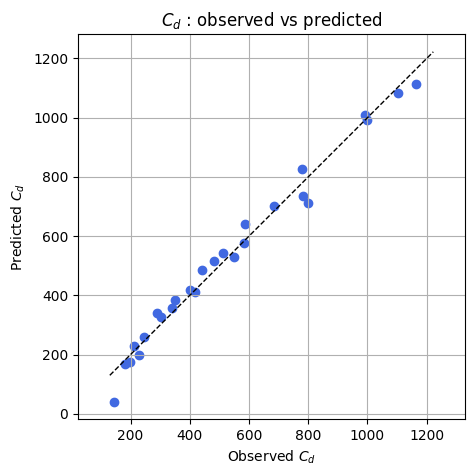


Model saved to /content/Cd_linear_model.pkl


In [ ]:

import pandas as pd

xls      = pd.ExcelFile('/content/drive/MyDrive/layout/layout.xlsx')
height   = xls.parse('height').set_index('Name of file')     # 25 height cells per row  [1]
furb     = xls.parse('F_urb').set_index('Name of file')      # 25 F_urb cells per row   [1]
target   = xls.parse('C_d').set_index('Name of file')['Cd values']   # single C_d value   [1]

#--------------------------------------------------
# 2. Build the feature matrix
#--------------------------------------------------
features = pd.DataFrame({
    'mean_height': height.mean(axis=1),
    'std_height' : height.std(axis=1),
    'mean_furb'  : furb.mean(axis=1),
    'std_furb'   : furb.std(axis=1)
})

data = features.join(target).dropna()      # 27 → 27 rows, 0 NaNs

#--------------------------------------------------
# 3. Fit a linear regression and cross-validate
#--------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

X, y = data.iloc[:, :4], data['Cd values']

lm = LinearRegression().fit(X, y)

print('Intercept  : {:.3f}'.format(lm.intercept_))
for name, coef in zip(X.columns, lm.coef_):
    print(f'{name:12}: {coef:9.3f}')

print('\nTraining R²: {:.3f}'.format(lm.score(X, y)))

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_r2 = cross_val_score(lm, X, y, cv=cv, scoring='r2')
print('5-fold CV R²: {:.3f} ± {:.3f}'.format(cv_r2.mean(), cv_r2.std()))

#--------------------------------------------------
# 4. Add predictions and inspect the first rows
#--------------------------------------------------
data['Cd_pred'] = lm.predict(X)
display(data[['Cd values', 'Cd_pred']].head())

#--------------------------------------------------
# 5. Parity plot
#--------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(y, data['Cd_pred'], c='royalblue')
lims = [y.min()*0.9, y.max()*1.05]
plt.plot(lims, lims, 'k--', lw=1)
plt.xlabel('Observed $C_d$')
plt.ylabel('Predicted $C_d$')
plt.title('$C_d$ : observed vs predicted')
plt.grid(True); plt.axis('equal'); plt.show()

#--------------------------------------------------
# 6. (Optional) persist the model
#--------------------------------------------------
import joblib, datetime, os
joblib.dump(lm, 'Cd_linear_model.pkl')
print('\nModel saved to', os.path.abspath('Cd_linear_model.pkl'))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# -------------------------------------------------
# 1) Read the Excel file
# -------------------------------------------------
excel_path = "/content/layout (3).xlsx"      # <-- change if needed
df_values = pd.read_excel(excel_path, sheet_name="Values")
df_cd     = pd.read_excel(excel_path, sheet_name="C_d")

# -------------------------------------------------
# 2) Merge on the common key
# -------------------------------------------------
df = pd.merge(df_values, df_cd, on="Name of file", how="inner")

# -------------------------------------------------
# 3) Feature engineering:  h² / Furb²
# -------------------------------------------------
df["h2_div_f"] = (df["Height Mean"]**2) / (df["F_urb Mean"])

# -------------------------------------------------
# 4) Define inputs (X) and target (y)
# -------------------------------------------------
X = df[["h2_div_f"]]
y = df["Cd values"]

# Train on files 2–26 (indices 1–25)
X_train = X.iloc[0:26]
y_train = y.iloc[0:26]

# Test on files 1, 2, 3, 4, 27, 28 (indices 0, 1, 2, 3, 26, 27)
test_indices = [0, 1, 2, 3, 25, 26]
print("Number of rows in the merged DataFrame:", len(df))

X_test = X.iloc[test_indices]
y_test = y.iloc[test_indices]

# -------------------------------------------------
# 5) Fit the model
# -------------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -------------------------------------------------
# 6) Predictions and metrics
# -------------------------------------------------
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

# Metrics
r2_train  = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# R² is only valid if ≥2 samples in test
r2_test = r2_score(y_test, y_test_pred) if len(y_test) >= 2 else np.nan
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# -------------------------------------------------
# 7) Nicely formatted output
# -------------------------------------------------
print("=" * 15, "Linear Regression Results", "=" * 15)
print(f"Intercept                : {model.intercept_: .4f}")
print(f"Coefficient (h2_div_f)   : {model.coef_[0]: .4f}")
print("--------------------------------------------------------")
print(f"R²  on train set         : {r2_train: .4f}")
print(f"RMSE on train set        : {rmse_train: .4f}")
print(f"R²  on test set          : {r2_test if not np.isnan(r2_test) else 'N/A'}")
print(f"MAE on test set          : {mae_test: .4f}")
print(f"RMSE on test set         : {rmse_test: .4f}")

# -------------------------------------------------
# 8) Detailed view of the test predictions
# -------------------------------------------------
print("\n--- Test-set predictions ---")
print(
    pd.DataFrame({
        "Name of file": df.loc[X_test.index, "Name of file"].values,
        "h2_div_f"    : X_test["h2_div_f"].values,
        "Cd True"     : y_test.values,
        "Cd Pred"     : y_test_pred,
    }).to_string(index=False)
)


Number of rows in the merged DataFrame: 27
=============== Linear Regression Results ===============
Intercept                : -146.0682
Coefficient (h2_div_f)   :  14.4666
--------------------------------------------------------
R²  on train set         :  0.8719
RMSE on train set        :  105.3797
R²  on test set          : 0.7579267533764461
MAE on test set          :  82.3244
RMSE on test set         :  98.0506

--- Test-set predictions ---
                      Name of file  h2_div_f  Cd True    Cd Pred
   constant_height_5random_gap.geo 21.265151 197.7868 161.565506
 constant_height_7.5random_gap.geo 31.698943 417.9165 312.506663
  constant_height_10random_gap.geo 41.880056 550.5648 459.792427
constant_height_12.5random_gap.geo 52.887390 799.8458 619.030774
         random_height_gap (2).geo 30.672669 314.9140 297.660007
         random_height_gap (3).geo 25.738694 289.7563 226.282316


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# -------------------------------------------------
# 1) Read the Excel file
# -------------------------------------------------
excel_path = "/content/layout (4).xlsx"  # <-- adjust if needed
df_values = pd.read_excel(excel_path, sheet_name="Values")
df_cd     = pd.read_excel(excel_path, sheet_name="C_d")

# -------------------------------------------------
# 2) Merge on the common key
# -------------------------------------------------
df = pd.merge(df_values, df_cd, on="Name of file", how="inner")
print("Number of rows in the merged DataFrame:", len(df))

# -------------------------------------------------
# 3) Feature engineering: variations up to degree 2
# -------------------------------------------------
h = df["Height Mean"]
f = df["F_urb Mean"]

df["h"]                         = h
df["f"]                         = f
df["h_squared"]                 = h ** 2
df["f_squared"]                 = f ** 2
df["h_times_f"]                 = h * f
df["h_div_f"]                   = h / f
df["f_div_h"]                   = f / h
df["h_squared_div_f"]           = h ** 2 / f
df["f_squared_div_h"]           = f ** 2 / h
df["h_div_f_squared"]           = h / (f ** 2)
df["f_div_h_squared"]           = f / (h ** 2)
df["h_squared_div_f_squared"]   = (h ** 2) / (f ** 2)
df["f_squared_plus_h"]          = (f ** 2) + h
df["h_squared_plus_f"]          = (h ** 2) + f
df["h_times_f_squared"]         = h * (f ** 2)
df["f_times_h_squared"]         = f * (h ** 2)
df["f_cubed_div_f_squared"]     = (f ** 3) / (f ** 2)
df["h_cubed_div_h_squared"]     = (h ** 3) / (h ** 2)
df["f_cubed_div_h"]= (f ** 3) / h
df["h_cubed_div_f"] = (h ** 3) / f
df["h_cubed_div_f_squared"] = (h ** 3) / (f ** 2)
df["f_cubed_div_h_squared"] = (f ** 3) / (h ** 2)


# Also keeping your original feature for model
df["h2_div_f"] = df["h_cubed_div_f_squared"]

# -------------------------------------------------
# 4) Define inputs (X) and target (y)
# -------------------------------------------------
X = df[["h_div_f"]]
y = df["Cd values"]

# Train on rows 0–25 (i.e., files 1–26)
X_train = X.iloc[0:26]
y_train = y.iloc[0:26]

# Test on rows 0,1,2,3,25,26 (files 1,2,3,4,26,27)
test_indices = [i for i in [0, 1, 2, 3, 25, 26] if i < len(df)]
X_test = X.iloc[test_indices]
y_test = y.iloc[test_indices]

# -------------------------------------------------
# 5) Fit the model
# -------------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -------------------------------------------------
# 6) Predictions and metrics
# -------------------------------------------------
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

r2_train  = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_test = r2_score(y_test, y_test_pred) if len(y_test) >= 2 else np.nan
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# -------------------------------------------------
# 7) Output summary
# -------------------------------------------------
print("=" * 15, "Linear Regression Results", "=" * 15)
print(f"Intercept                    : {model.intercept_: .4f}")
print(f"Coefficient (h2_div_f)       : {model.coef_[0]: .4f}")
print("--------------------------------------------------------")
print(f"R²  on train set             : {r2_train: .4f}")
print(f"RMSE on train set            : {rmse_train: .4f}")
print(f"R²  on test set              : {r2_test if not np.isnan(r2_test) else 'N/A'}")
print(f"MAE on test set              : {mae_test: .4f}")
print(f"RMSE on test set             : {rmse_test: .4f}")

# -------------------------------------------------
# 8) Print feature variations for all rows
# -------------------------------------------------
print("\n--- Feature Variations (first few rows) ---")
cols_to_show = [
    "Name of file", "h", "f", "h_squared", "f_squared", "h_times_f", "h_div_f", "f_div_h",
    "h_squared_div_f", "f_squared_div_h", "h_div_f_squared", "f_div_h_squared",
    "h_squared_div_f_squared", "f_squared_plus_h", "h_squared_plus_f",
    "h_times_f_squared", "f_times_h_squared"
]

print(df[cols_to_show].round(3).to_string(index=False))


Number of rows in the merged DataFrame: 27
=============== Linear Regression Results ===============
Intercept                    : -146.0682
Coefficient (h2_div_f)       :  14.4666
--------------------------------------------------------
R²  on train set             :  0.8719
RMSE on train set            :  105.3797
R²  on test set              : 0.7579267533764461
MAE on test set              :  82.3244
RMSE on test set             :  98.0506

--- Feature Variations (first few rows) ---
                      Name of file      h     f  h_squared  f_squared  h_times_f  h_div_f  f_div_h  h_squared_div_f  f_squared_div_h  h_div_f_squared  f_div_h_squared  h_squared_div_f_squared  f_squared_plus_h  h_squared_plus_f  h_times_f_squared  f_times_h_squared
   constant_height_5random_gap.geo  5.000 0.235     25.000      0.055      1.176   21.265    0.047          106.326            0.011           90.441            0.009                  452.207             5.055            25.235             

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# -------------------------------------------------
# 1) Read the Excel file
# -------------------------------------------------
excel_path = "/content/layout (4).xlsx"  # <-- adjust path if needed
df_values = pd.read_excel(excel_path, sheet_name="Values")
df_cd     = pd.read_excel(excel_path, sheet_name="C_d")

# -------------------------------------------------
# 2) Merge on the common key
# -------------------------------------------------
df = pd.merge(df_values, df_cd, on="Name of file", how="inner")
print("Number of rows in the merged DataFrame:", len(df))

# -------------------------------------------------
# 3) Feature Engineering
# -------------------------------------------------
h = df["Height Mean"]
f = df["F_urb Mean"]
σh = df["Height std"]
σf = df["F_urb std"]

# Compute requested features
df["h_squared_div_f"] = (h) * f
df["rel_height_std"] = σh / h
df["rel_furb_std"] = σf / f

# -------------------------------------------------
# 4) Define inputs (X) and target (y)
# -------------------------------------------------
X = df[["h_squared_div_f", "rel_height_std", "rel_furb_std"]]
y = df["Cd values"]

# Train on rows 3–26 (indices 2–25)
X_train = X.iloc[2:26]
y_train = y.iloc[2:26]

# Test on rows 0, 1, 2, 3, 25, 26 (files 1–4, 26–27)
test_indices = [i for i in [0, 1, 2, 3, 25, 26] if i < len(df)]
X_test = X.iloc[test_indices]
y_test = y.iloc[test_indices]

# -------------------------------------------------
# 5) Fit the model
# -------------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -------------------------------------------------
# 6) Predictions and metrics
# -------------------------------------------------
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

r2_train  = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_test = r2_score(y_test, y_test_pred) if len(y_test) >= 2 else np.nan
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# -------------------------------------------------
# 7) Output summary
# -------------------------------------------------
print("=" * 15, "Linear Regression Results", "=" * 15)
print(f"Intercept                        : {model.intercept_: .4f}")
print(f"Coefficients (h²/f, σh/h, σf/f) : {model.coef_}")
print("--------------------------------------------------------")
print(f"R²  on train set                 : {r2_train: .4f}")
print(f"RMSE on train set                : {rmse_train: .4f}")
print(f"R²  on test set                  : {r2_test if not np.isnan(r2_test) else 'N/A'}")
print(f"MAE on test set                  : {mae_test: .4f}")
print(f"RMSE on test set                 : {rmse_test: .4f}")

# -------------------------------------------------
# 8) Show predictions
# -------------------------------------------------
print("\n--- Test-set Predictions ---")
print(
    pd.DataFrame({
        "Name of file": df.loc[X_test.index, "Name of file"].values,
        "h²/f"        : df.loc[X_test.index, "h_squared_div_f"].values,
        "σh/h"        : df.loc[X_test.index, "rel_height_std"].values,
        "σf/f"        : df.loc[X_test.index, "rel_furb_std"].values,
        "Cd True"     : y_test.values,
        "Cd Pred"     : y_test_pred
    }).round(4).to_string(index=False)
)


Number of rows in the merged DataFrame: 27
=============== Linear Regression Results ===============
Intercept                        : -115.8666
Coefficients (h²/f, σh/h, σf/f) : [ 12.75050473 399.05969763 447.51892321]
--------------------------------------------------------
R²  on train set                 :  0.9174
RMSE on train set                :  85.4523
R²  on test set                  : 0.5365073603620347
MAE on test set                  :  120.3994
RMSE on test set                 :  135.6746

--- Test-set Predictions ---
                      Name of file    h²/f   σh/h   σf/f  Cd True  Cd Pred
   constant_height_5random_gap.geo 21.2652 0.0000 0.1462 197.7868 220.7241
 constant_height_7.5random_gap.geo 31.6989 0.0000 0.0417 417.9165 306.9662
  constant_height_10random_gap.geo 41.8801 0.0000 0.1359 550.5648 478.9302
constant_height_12.5random_gap.geo 52.8874 0.0000 0.0504 799.8458 581.0249
         random_height_gap (2).geo 30.6727 0.2825 0.1487 314.9140 454.5210
         ra

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# -------------------------------------------------
# 1) Read the Excel file
# -------------------------------------------------
excel_path = "/content/layout (4).xlsx"  # Adjust if needed
df_values = pd.read_excel(excel_path, sheet_name="Values")
df_cd     = pd.read_excel(excel_path, sheet_name="C_d")

# -------------------------------------------------
# 2) Merge on common key
# -------------------------------------------------
df = pd.merge(df_values, df_cd, on="Name of file", how="inner")
print("Number of rows in the merged DataFrame:", len(df))

# -------------------------------------------------
# 3) Feature Engineering: h * f and its std
# -------------------------------------------------
h = df["Height Mean"]
f = df["F_urb Mean"]
σh = df["Height std"]
σf = df["F_urb std"]

# Compute product and propagated std
df["h_times_f"] = h * f
df["h_times_f_std"] = df["h_times_f"] * np.sqrt((σh / h) ** 2 + (σf / f) ** 2)

# Optional: relative std (coefficient of variation)
df["rel_std_h_times_f"] = df["h_times_f_std"] / df["h_times_f"]

# -------------------------------------------------
# 4) Define inputs (X) and target (y)
# -------------------------------------------------
X = df[["h_times_f", "h_times_f_std"]]
y = df["Cd values"]

# Train on rows 3–26 (indices 2–25)
X_train = X.iloc[2:26]
y_train = y.iloc[2:26]

# Test on rows 0, 1, 2, 3, 25, 26
test_indices = [i for i in [0, 1, 2, 3, 25, 26] if i < len(df)]
X_test = X.iloc[test_indices]
y_test = y.iloc[test_indices]

# -------------------------------------------------
# 5) Fit the model
# -------------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -------------------------------------------------
# 6) Predictions and metrics
# -------------------------------------------------
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

r2_train  = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_test = r2_score(y_test, y_test_pred) if len(y_test) >= 2 else np.nan
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# -------------------------------------------------
# 7) Output summary
# -------------------------------------------------
print("=" * 15, "Linear Regression Results", "=" * 15)
print(f"Intercept                        : {model.intercept_: .4f}")
print(f"Coefficients (h*f, σ_hf)         : {model.coef_}")
print("--------------------------------------------------------")
print(f"R²  on train set                 : {r2_train: .4f}")
print(f"RMSE on train set                : {rmse_train: .4f}")
print(f"R²  on test set                  : {r2_test if not np.isnan(r2_test) else 'N/A'}")
print(f"MAE on test set                  : {mae_test: .4f}")
print(f"RMSE on test set                 : {rmse_test: .4f}")

# -------------------------------------------------
# 8) Detailed prediction view
# -------------------------------------------------
print("\n--- Test-set Predictions ---")
print(
    pd.DataFrame({
        "Name of file": df.loc[X_test.index, "Name of file"].values,
        "h*f"         : df.loc[X_test.index, "h_times_f"].values,
        "σ(h*f)"      : df.loc[X_test.index, "h_times_f_std"].values,
        "Cd True"     : y_test.values,
        "Cd Pred"     : y_test_pred
    }).round(4).to_string(index=False)
)


Number of rows in the merged DataFrame: 27
=============== Linear Regression Results ===============
Intercept                        : -29.2111
Coefficients (h*f, σ_hf)         : [238.90873866 656.93603323]
--------------------------------------------------------
R²  on train set                 :  0.7287
RMSE on train set                :  154.8609
R²  on test set                  : 0.3687541898933583
MAE on test set                  :  133.3642
RMSE on test set                 :  158.3348

--- Test-set Predictions ---
                      Name of file    h*f  σ(h*f)  Cd True  Cd Pred
   constant_height_5random_gap.geo 1.1756  0.1719 197.7868 364.6082
 constant_height_7.5random_gap.geo 1.7745  0.0740 417.9165 443.3292
  constant_height_10random_gap.geo 2.3878  0.3244 550.5648 754.3777
constant_height_12.5random_gap.geo 2.9544  0.1489 799.8458 774.4184
         random_height_gap (2).geo 1.0477  0.3345 314.9140 440.8381
         random_height_gap (3).geo 1.1376  0.4566 289.7563 542.54

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# --------------------------------------------------
# 1. Read the two sheets and merge on "Name of file"
# --------------------------------------------------
xls   = '/content/layout (6).xlsx'                     # path
vals  = pd.read_excel(xls, sheet_name='Values',
                      usecols=['Name of file', 'Height Mean', 'F_urb Mean'])  # h & f
cd    = pd.read_excel(xls, sheet_name='C_d',
                      usecols=['Name of file', 'Actual Cd Values'])           # target
df    = (vals.merge(cd, on='Name of file')      # rows: 30 urban layouts[1]
            .rename(columns={'Height Mean':'h',
                             'F_urb Mean':'f'}))

# --------------------------------------------------
# 2. Define the features you want to try
#    (just add or remove lines here)
# --------------------------------------------------
feature_defs = {
    #'h'        : lambda d: d['h'],
    #'f'        : lambda d: d['f'],
    #'h/f'      : lambda d: d['h'] / d['f'],
    'h²/f'     : lambda d: (d['h']**2) / d['f'],
    #'f/h'      : lambda d: d['f'] / d['h'],
    #'h*f'      : lambda d: d['h'] * d['f'],
}

# --------------------------------------------------
# 3. Build X from those definitions
# --------------------------------------------------
X = pd.DataFrame({name: func(df) for name, func in feature_defs.items()})
y = df['Actual Cd Values']

# --------------------------------------------------
# 4. Fit and report
# --------------------------------------------------
model = LinearRegression().fit(X, y)

print(f"intercept : {model.intercept_: .6f}")
for name, coef in zip(X.columns, model.coef_):
    print(f"{name:6}: {coef: .6f}")
print(f"R² (all data) : {model.score(X, y): .4f}")


intercept :  0.004020
h²/f  :  0.000046
R² (all data) :  0.7566
